In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

from ipywidgets import interact;

In [3]:
data = pd.read_csv('data.csv');

In [4]:
data.head(100)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [5]:
print("Shape Of Dataset:",data.shape)

Shape Of Dataset: (2200, 8)


In [4]:
data.isnull().sum()
#Shows null values; 0 means there are no null values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.count()
#shows non-null values; 

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [16]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [23]:
 print("Average Ratio of Nitrogen: {0:.2f}".format(data['N'].mean()))
    #Here {0:.2f} means we need the result to 2 decimals

Average Ratio of Nitrogen: 50.55


In [11]:
@interact 
#If not added @interact here; we won't get the crops dropdown
def summary(crops = list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    #x is the new name; matching data[label] and crops
    #till this line means that you are searching for crops by label columnand terming label column matches the dataset
    print("Min of Nitrogen:",x['N'].min())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [19]:
#comparing the average of each crop

@interact  
def compare(conditions =['N','P' ,'K', 'temperature', 'ph', 'humidity','rainfall']):
    print('Average value', conditions ,"is {0:0.2f}".format(data[conditions].mean()))
    print("Rice: {0:0.2f}".format(data[(data['label']=='rice')][conditions].mean()))
    #Here we need rice value in decimals, where rice is matching the label column with the necessary conditions set

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\Kaverappa Mapanamada\AppData\Local\Temp\ipykernel_34124\1796941733.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['temperature'],color = 'green')
C:\Users\Kaverappa Mapanamada\AppData\Local\Temp\ipykernel_34124\1796941733.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat

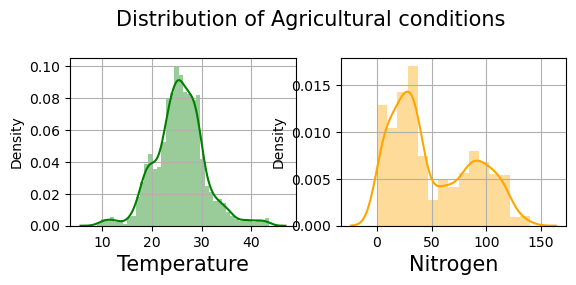

In [63]:
#Distribution plotting using Seaborn

plt.subplot(2,2,1) #row,column,first plot
sns.distplot(data['temperature'],color = 'green')
plt.xlabel('Temperature', fontsize=15)
plt.grid()

plt.subplot(2,2,2)
sns.distplot(data['N'],color='orange')
plt.xlabel('Nitrogen', fontsize=15)
plt.grid()


plt.suptitle('Distribution of Agricultural conditions',fontsize=15)
plt.show()

In [69]:
#Filtering some data
print('Filtering the data for our convinient')
print('--------------------------------------------')
print('Crops which require more Nitrogen in soil:', data[data['N']>120]['label'].unique())

Filtering the data for our convinient
--------------------------------------------
Crops which require more Nitrogen in soil: ['cotton']


In [75]:
#Growing in particular seasons

print('Summer crops')
print('--------------------------------------------')
print(data[(data['temperature']>30) & (data['humidity']>50) ]['label'].unique())

Summer crops
--------------------------------------------
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


In [7]:
#clustering analysis from sklearn
#before using cluster we need to know how any cluster is required; that is by using ELBOW method


from sklearn.cluster import KMeans

x=data.drop(['label'], axis=1)
x.values
x.shape

(2200, 7)

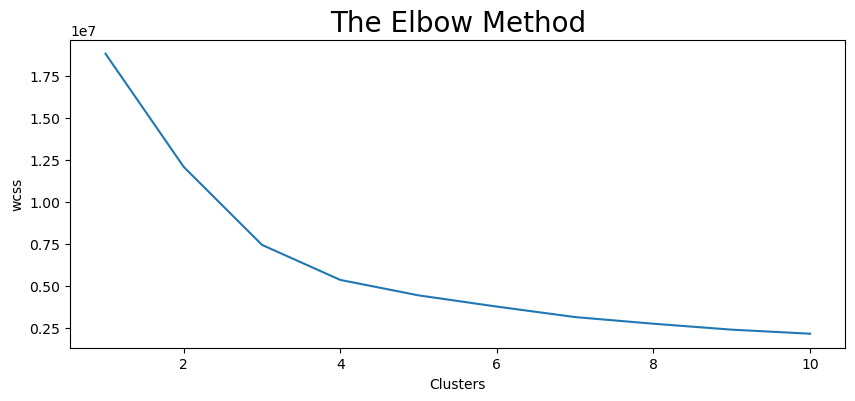

In [11]:
#Plotting elbow chart

plt.rcParams['figure.figsize']=(10,4) #fig area

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init =10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
 #Plotting the result   
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
#Logistic Regression is used in probability situation
#Splitting the dataset for predictive modelling

y=data['label']
x=data.drop(['label'],axis=1)

print('Shape of x:', x.shape)
print('Shap of y:', y.shape)


Shape of x: (2200, 7)
Shap of y: (2200,)


In [17]:
#Splitting into train&test dataset to validate results 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)
#80% of data goes to training & 20% to testing

print("Shape of x train:", x_train.shape)
print("Shape of x test:", x_test.shape)
print("Shape of y train:", y_train.shape)
print("Shape of y test:", y_test.shape)



Shape of x train: (1760, 7)
Shape of x test: (440, 7)
Shape of y train: (1760,)
Shape of y test: (440,)


In [18]:
#creating predictive model using logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)




C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


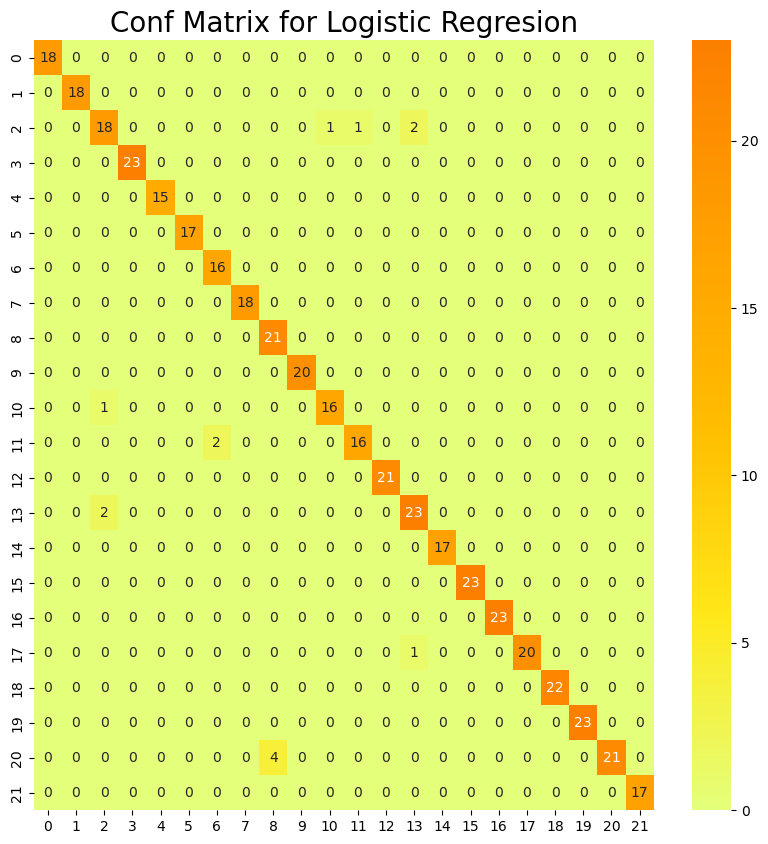

In [22]:
#model performance
from sklearn.metrics import confusion_matrix

#printing confusion matrix
plt.rcParams['figure.figsize']=(10,10)
#rc means runtime configuration in python for default styles
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, cmap='Wistia')#annot is used as same shape as the data
plt.title('Conf Matrix for Logistic Regresion', fontsize=20)
plt.show()

In [27]:
#classification report
cr=classification_report(y_test, y_pred, labels=[0,1,2])
print(cr)

NameError: name 'classification_report' is not defined

In [28]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
#predicting                         #first row values N,P,K....
prediction = model.predict(np.array([[90,40,40,20,80,7,200]]))
print('suggested climate is:', prediction)
#Answer must be rice as the give condition satisfies it.

suggested climate is: ['rice']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
